In [8]:
# import packages:

from collections import defaultdict # easy way to create placeholder of dict with list, then to df

#import matplotlib
#from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
%matplotlib inline
import numpy as np
import pandas as pd

import time
import simpy
import simpy.rt

In [9]:
# Set Initial values
rp = 2000 #reservoir_pressure_psia
c = 0.01 #c_constant_mscfdpsi
n = 0.8 #n_exponent_unitless 
q = 0
iters = 100

In [10]:
aof = int(c * (rp**2)**n)
step = int(aof/iters)

In [11]:
# placeholder
stats = defaultdict(list)

In [12]:
# Define a function that takes in state, bhp, give up q

    for step in range(0, aof, step):
        stats['rp'].append(rp) # will start with initial value above
        stats['c'].append(c) # same here, adds column to df below
        stats['n'].append(n)
        stats['q'].append(q)

        ipr = (rp**2-(q/c)**(1/n))**(1/2)
        stats['ipr'].append(ipr)

        #reward = np.random.normal(loc=5, scale=1)
        #stats['reward'].append(reward)

        q += aof/iters



In [13]:
df = pd.DataFrame().from_dict(stats)
df;#.head()

final estimate 1911.999999999995


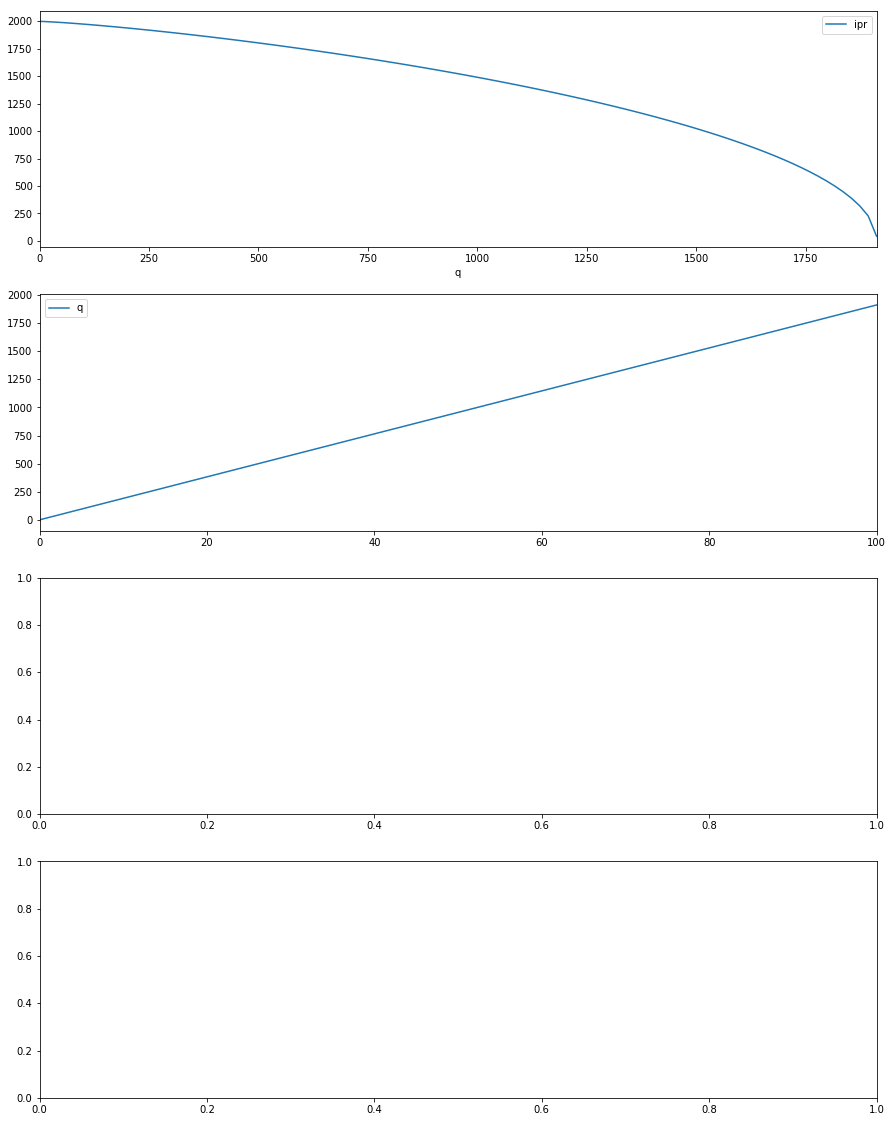

In [17]:
fig, ax = plt.subplots(nrows=4, figsize=(15,20))

df.plot(x='q', y='ipr', ax=ax[0])
df.plot(y='q', ax=ax[1])
#df.plot(y='omega', ax=ax[2])
#df.plot(y='beta', ax=ax[3])

print('final estimate {}'.format(stats['q'][-1]))

